# Plot Cross-Validation Results
Plot the results from `build-and-test-hierarchical-model.ipynb`

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.stats import bayes_mvs
import pandas as pd
import numpy as np

In [2]:
nice_name = {
    'random': 'Random\nGuessing',
    'single': 'Single\nModel',
    'hierarchical': 'Partitioned\nModel'
}
plot_width = 89 / 25.4;
plot_height = plot_width * 3.0 / 4.0;
width = 0.8
plot_dpi = 220
label_size = 12
n_guesses = 30

## Load in the test results
These results indicate the number of materials that have a band gap within a desired range after 30 guesses.

In [3]:
data = pd.read_csv('cv-results.csv')

## Compute the Mean and Confidence Intervals

In [4]:
mean = dict((x,data[x].mean()) for x in data)

In [5]:
def get_ci(x):
    f = bayes_mvs(x, alpha=0.95)[0]
    return f.minmax[1] - f.minmax[0]

In [6]:
ci = dict((x,get_ci(data[x])) for x in data)

In [7]:
results = pd.DataFrame({'mean': mean, 'ci': ci})

In [8]:
results.sort_values('mean', inplace=True)

Compute success rates

In [9]:
for x in ['mean', 'ci']:
    results['%s_percent'%x] = results[x] / n_guesses * 100

In [10]:
results

,ci,mean,mean_percent,ci_percent
random,0.705162,2.79,9.300000,2.350541
single,1.035271,18.68,62.266667,3.450904
hierarchical,0.873784,22.98,76.600000,2.912613


## Make the plot

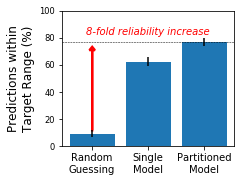

In [11]:
fig, ax = plt.subplots()

ax.bar(range(len(results)), results['mean'] / n_guesses * 100, yerr=results['ci'] / n_guesses * 100)

ax.set_xlim(ax.get_xlim())
ax.set_xticks(range(len(results)))
ax.set_xticklabels([nice_name[x] for x in results.index])

ax.set_ylim(0,100)
ax.set_ylabel('Predictions within\nTarget Range (%)', fontsize = label_size)
ax.tick_params(axis='y', which='major', labelsize = label_size * 0.7)

ax.arrow(0, results['mean_percent'].min() * 1.25,
        0, (0.925 * results['mean_percent'].max() - 1.25 * results['mean_percent'].min() ),
        head_width = 0.1, head_length=2.5,
        lw=2.25, ec='red')
ax.plot(ax.get_xlim(),[results['mean_percent'].max(),]*2,'k--',lw=0.5)
ax.text(np.mean(ax.get_xlim()), results['mean_percent'].max()*1.075, 
       '%.0f-fold reliability increase'%(results['mean_percent'].max()/results['mean_percent'].min()),
        ha='center', fontdict={'fontstyle':'italic', 'color':'red'})


fig.set_size_inches(plot_width, plot_height)
fig.tight_layout()
fig.savefig('figures/band-gap-model-comparision.png', dpi=plot_dpi)
fig.savefig('figures/band-gap-model-comparision.pdf')

Our results vary slightly from the paper. In that case, the difference between random guessing and the partitioned model was only 5-fold. Here, we find an 8-fold different and that the difference in performance between the 'single' and 'partitioned' model. This may very if we run the experiment again, but the error bars are small enough that we do not find random variations to be a likely explanation for the differences.